In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('matplotlib.mplstyle')

DATA_DIR = 'Data/3.2/'
data_name = 'summary.txt'

In [ ]:
# Importing summary files and combining them into a single dataframe (i = 1)
col_names = ['Step','t','M','LogL','LogR',
             'LogTs','LogTc','Logrhoc','logPc','psic',
             'Xc','Yc','XCc','XNc','XOc',
             'taudyn','tauKH','taunuc','Lpp','LCNO',
             'L3a','LZ','Lv','MHe','MC',
             'MO','RHe','RC','RO']

masses = np.array([0.1, 0.5, 1, 1.5, 2,
                   3, 5, 8, 10, 15,
                   20, 30, 50, 100])

# Dictionary to store dataframes
dataframes = {}

for i,mass in enumerate(masses):
    # Only import second row (i = 1) 
    df = pd.read_csv(DATA_DIR+f'{mass:.3g}M/'+'summary.txt',
                     delim_whitespace=True, header=None,
                     skiprows=1, nrows=1)
        
    dataframes[i] = df

# Combining individual dataframes
df = pd.concat(dataframes.values(), axis=0,
               ignore_index=True)

df.columns = col_names

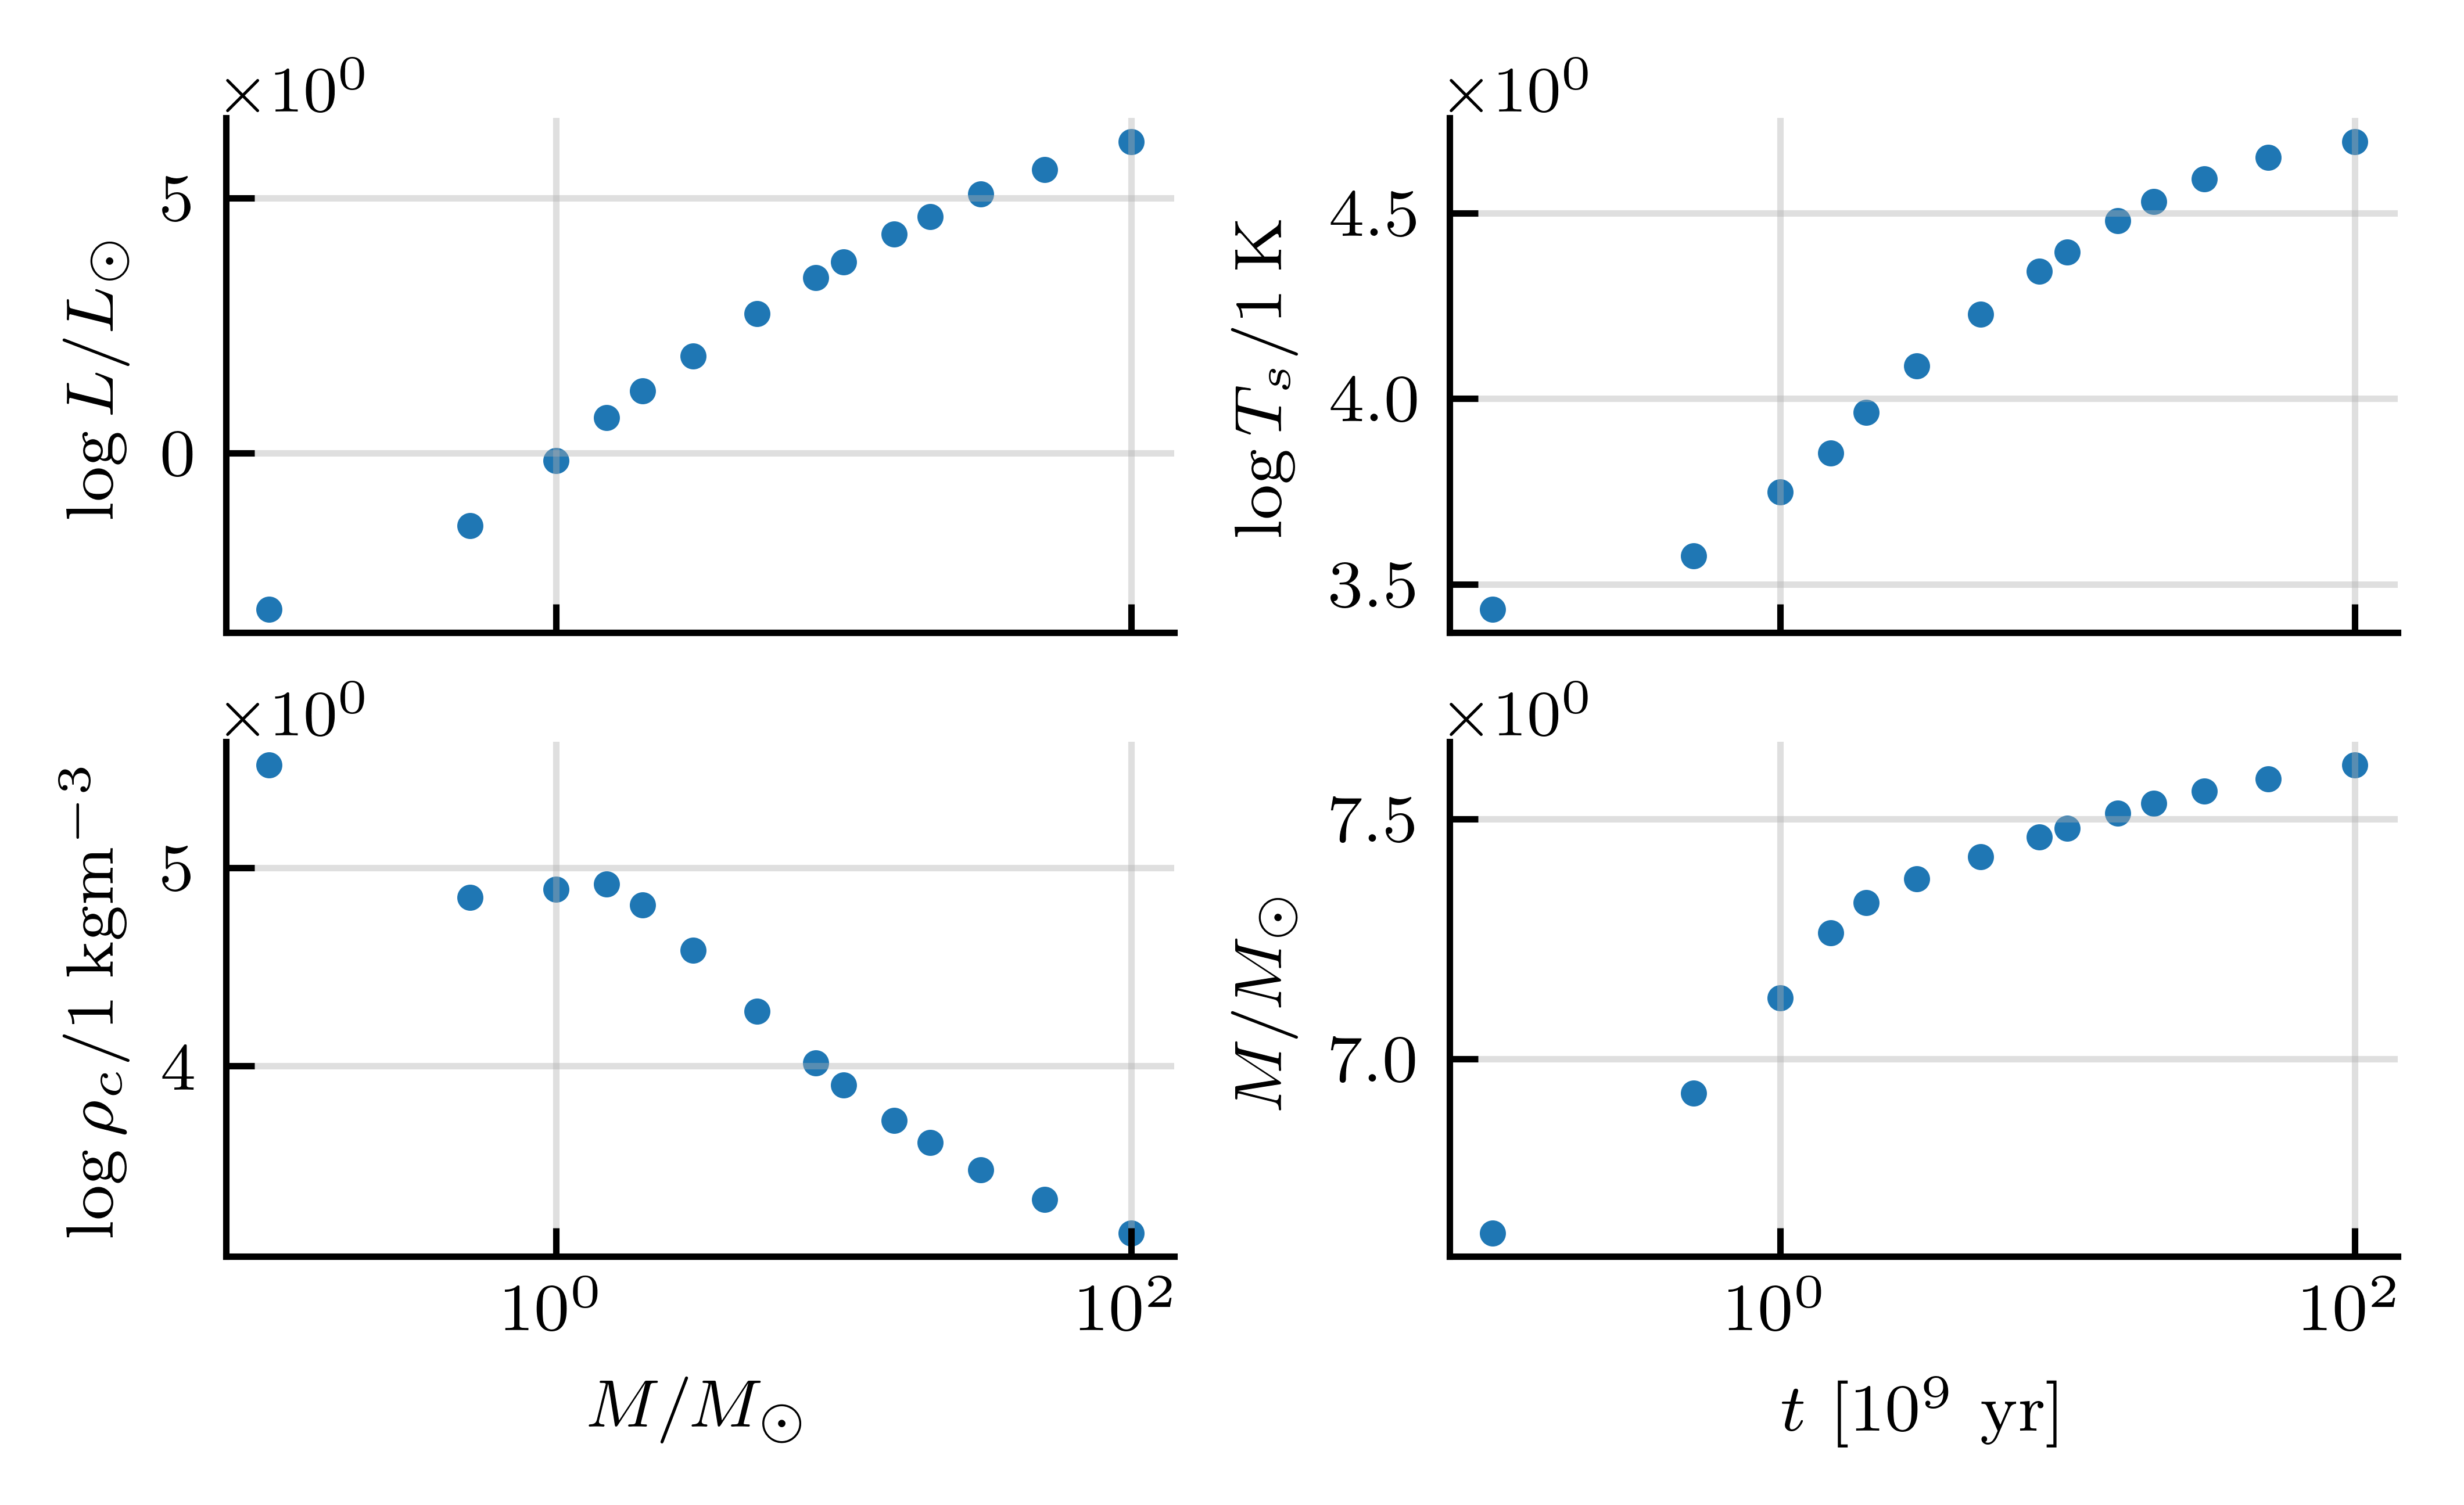

In [8]:
# Plotting M vs Tc, rhoc, L, Ts
from matplotlib.ticker import ScalarFormatter

plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

fig, axs = plt.subplots(2,2, sharex= True)
axs[0,0].scatter(df['M'],df['LogL'],s=5)
axs[0,0].set_ylabel(r"$\log L/L_\odot$")
axs[0,0].set_xscale('log')

axs[0,1].scatter(df['M'],df['LogTs'],s=5)
axs[0,1].set_ylabel(r"$\log T_s / 1 \: \mathrm{K}$")

axs[1,0].scatter(df['M'],df['Logrhoc'],s=5)
axs[1,0].set_xlabel(r"$M/M_\odot$")
axs[1,0].set_ylabel(r"$\log \rho_c / \mathrm{1 \: kg m^{-3}}$")

axs[1,1].scatter(df['M'],df['LogTc'],s=5)
axs[1,1].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
axs[1,1].set_ylabel(r"$M/M_\odot$")

x_pos = 0.0
y_pos = 1.0
offset_text = r'$\times \mathrm{10^{0}}$'
horizontalalignment='left'
verticalalignment='bottom'

for ax in axs.flat:
    ax.yaxis.set_minor_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
                horizontalalignment=horizontalalignment,
                verticalalignment=verticalalignment, fontsize = 8)
    ax.grid(which='both', alpha=0.4, visible=True)

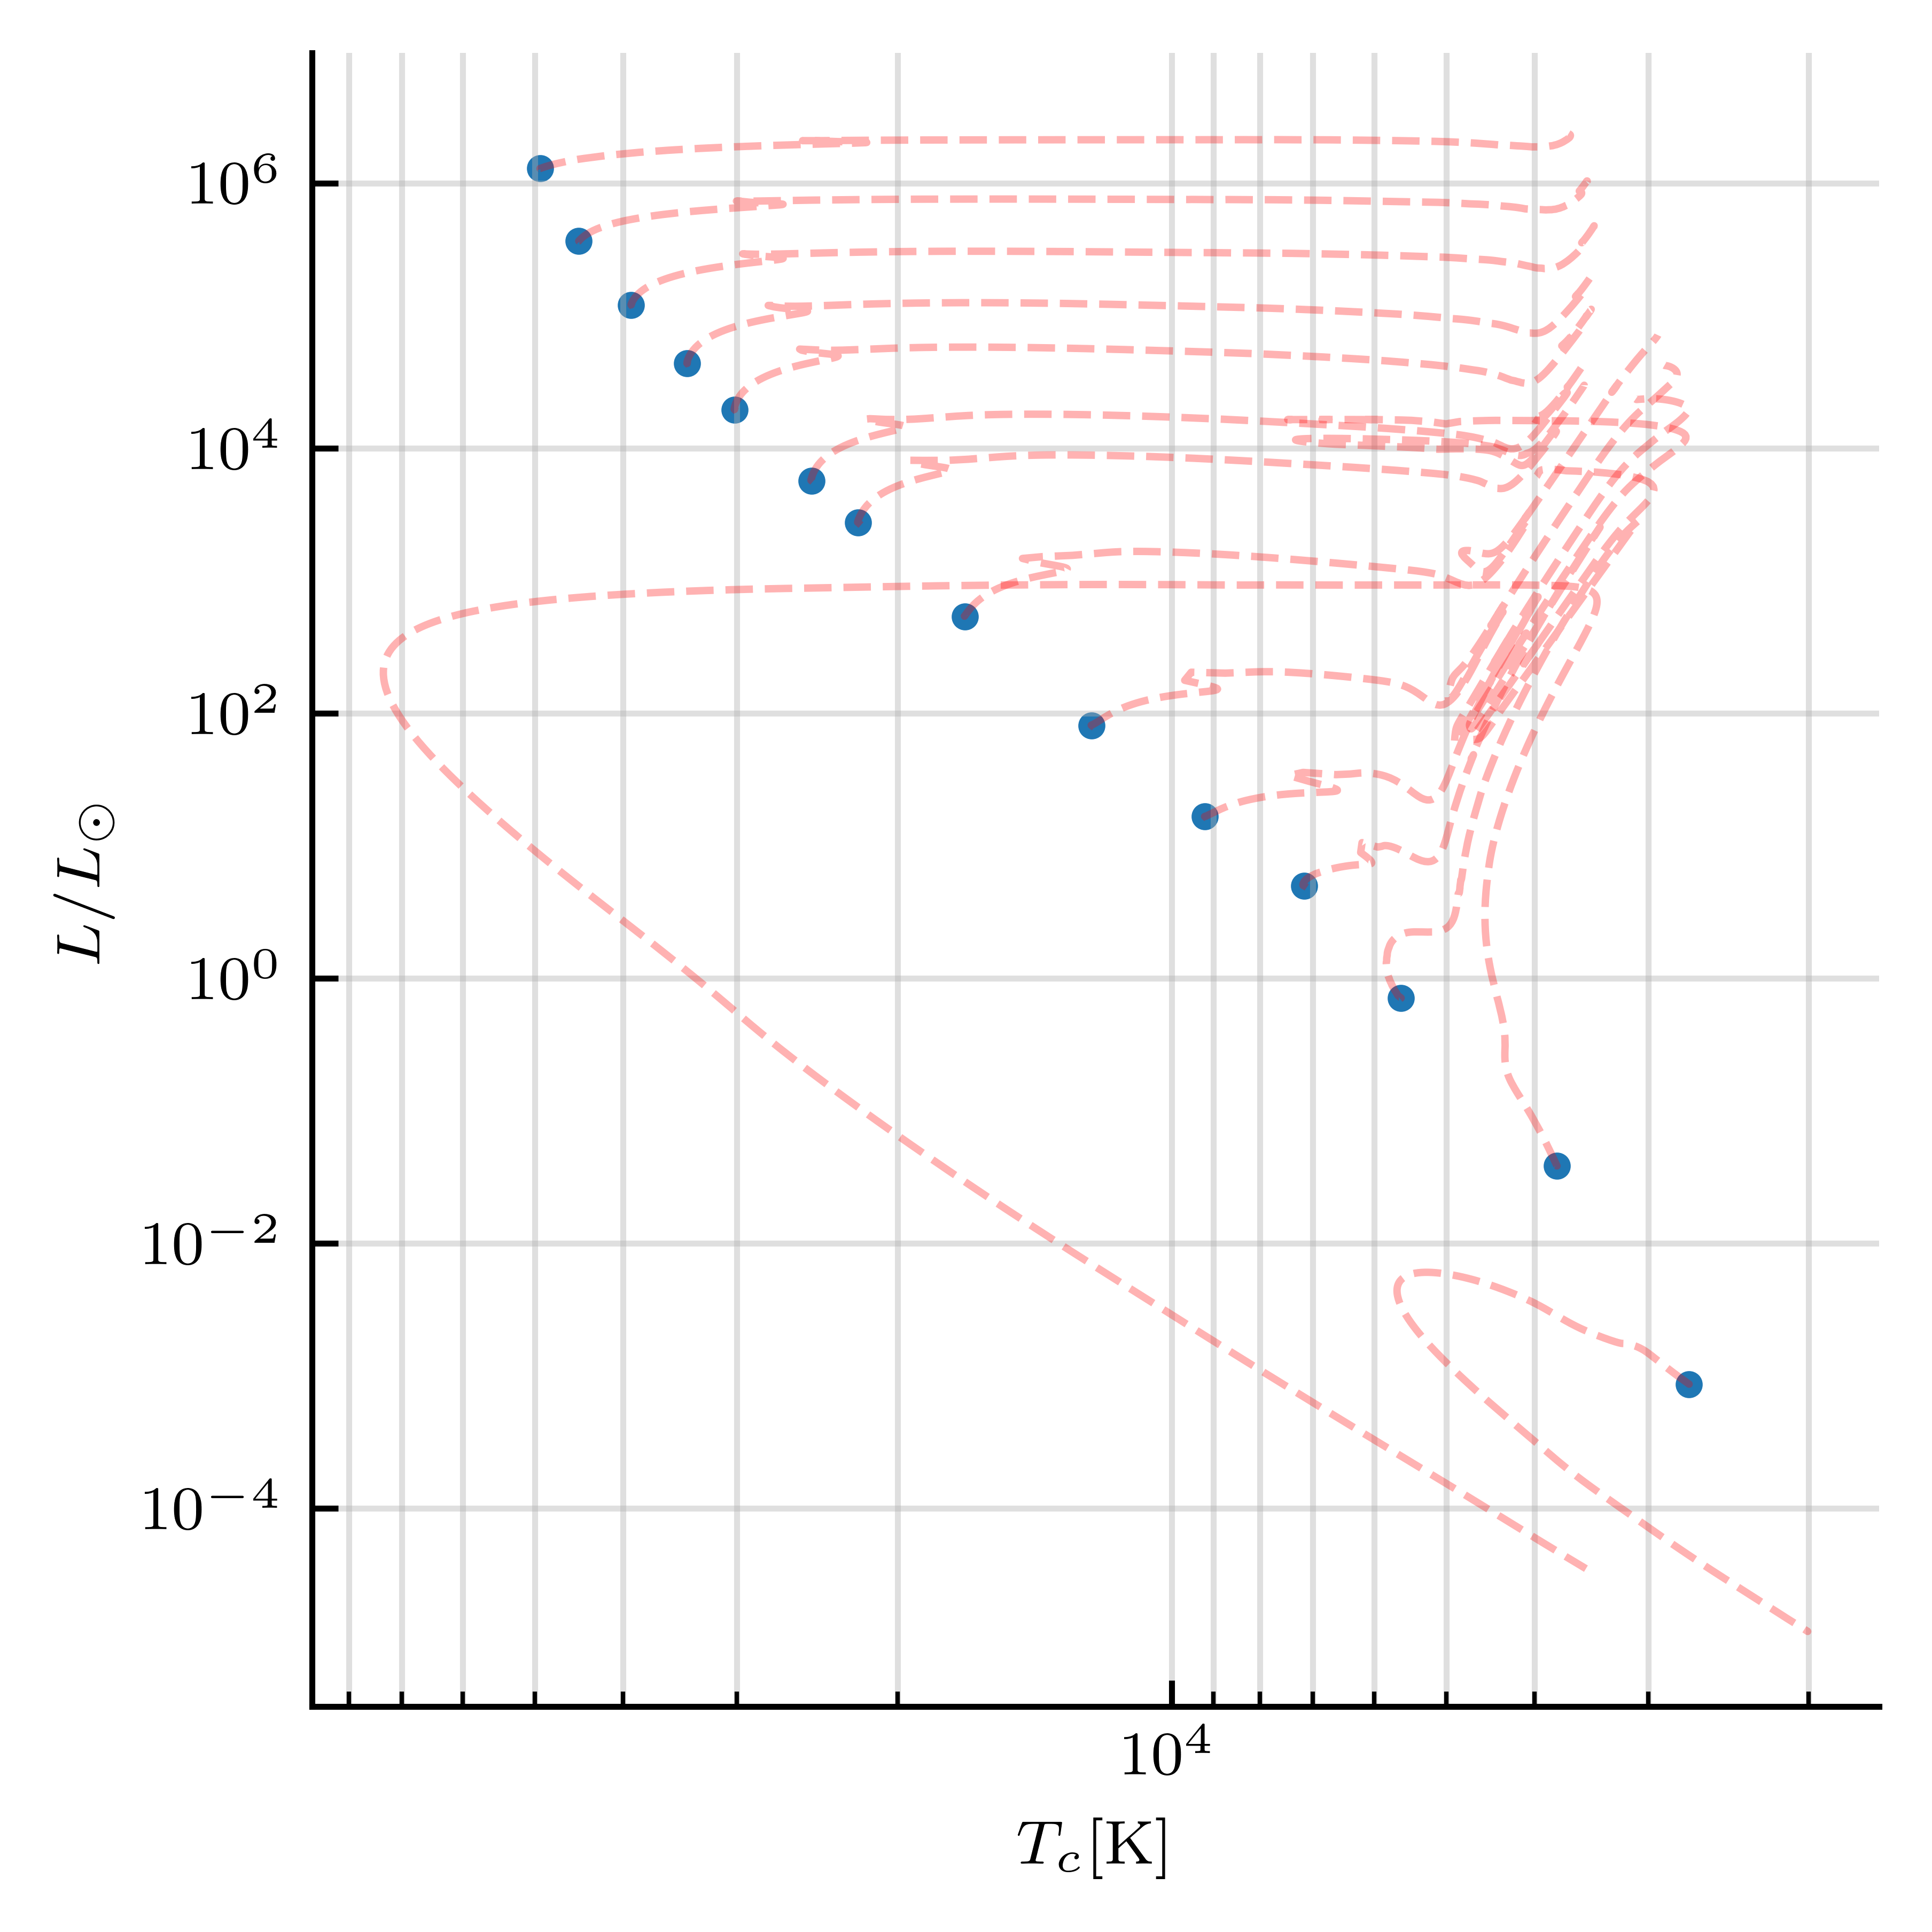

In [31]:
# Plotting HR diagram
fig,ax = plt.subplots(figsize=(3.5,3.5))

# Time evolution of the HR diagram?
if True:
    for mass in masses:
        df_evol = pd.read_csv(DATA_DIR+f'{mass:.3g}M/'+'summary.txt',
                     delim_whitespace=True, header=None)
        df_evol.columns = col_names
        ax.plot(10**df_evol['LogTs'],10**df_evol['LogL'],c='r',
                alpha=0.3,linestyle='dashed',linewidth=1)

ax.scatter(10**df['LogTs'],10**df['LogL'],s=7)

ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_ylim([1e-4,3e6])
#ax.set_xlim([2500,6e4])

ax.xaxis.set_inverted(True)

ax.set_xlabel(r'$T_c [\mathrm{K}]$')
ax.set_ylabel(r'$L / L_\odot$')

ax.grid(which='both', alpha=0.4, visible=True)